# Socio-Echonomic data of different countries

The dataset was uploaded from https://www.kaggle.com/santhraul/country-data. 

### PROBLEM STATEMENT:

Help International wants to allocate $10 million of funds that it has managed to raise, to the backward countries that need them the most in order to provide relief to its people during times of disasters and natural calamities. Therefore their challenge is to identify which countries genuinely need those funds, so that the funds can be effectively and strategically utilized.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow.compat.v2 as tf
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Embedding
from keras.optimizer_v2 import adam, rmsprop, gradient_descent 

In [2]:
data = pd.read_csv('Country-data.csv')
data.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
117,Panama,19.7,70.0,8.10,78.2,15400,2.590,77.8,2.62,8080
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.100,73.1,1.95,1310
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.270,74.5,2.15,9070
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830
65,Guyana,37.6,51.4,5.38,79.1,5840,5.730,65.5,2.65,3040
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
120,Philippines,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Observations

    There are no null values in the dataset
    
    All columns are according to their correct datatypes
    
    Values in the column "country" is only for interpretation and will not be used in building maschine learning model
    
    Numeric values will require scaling
    

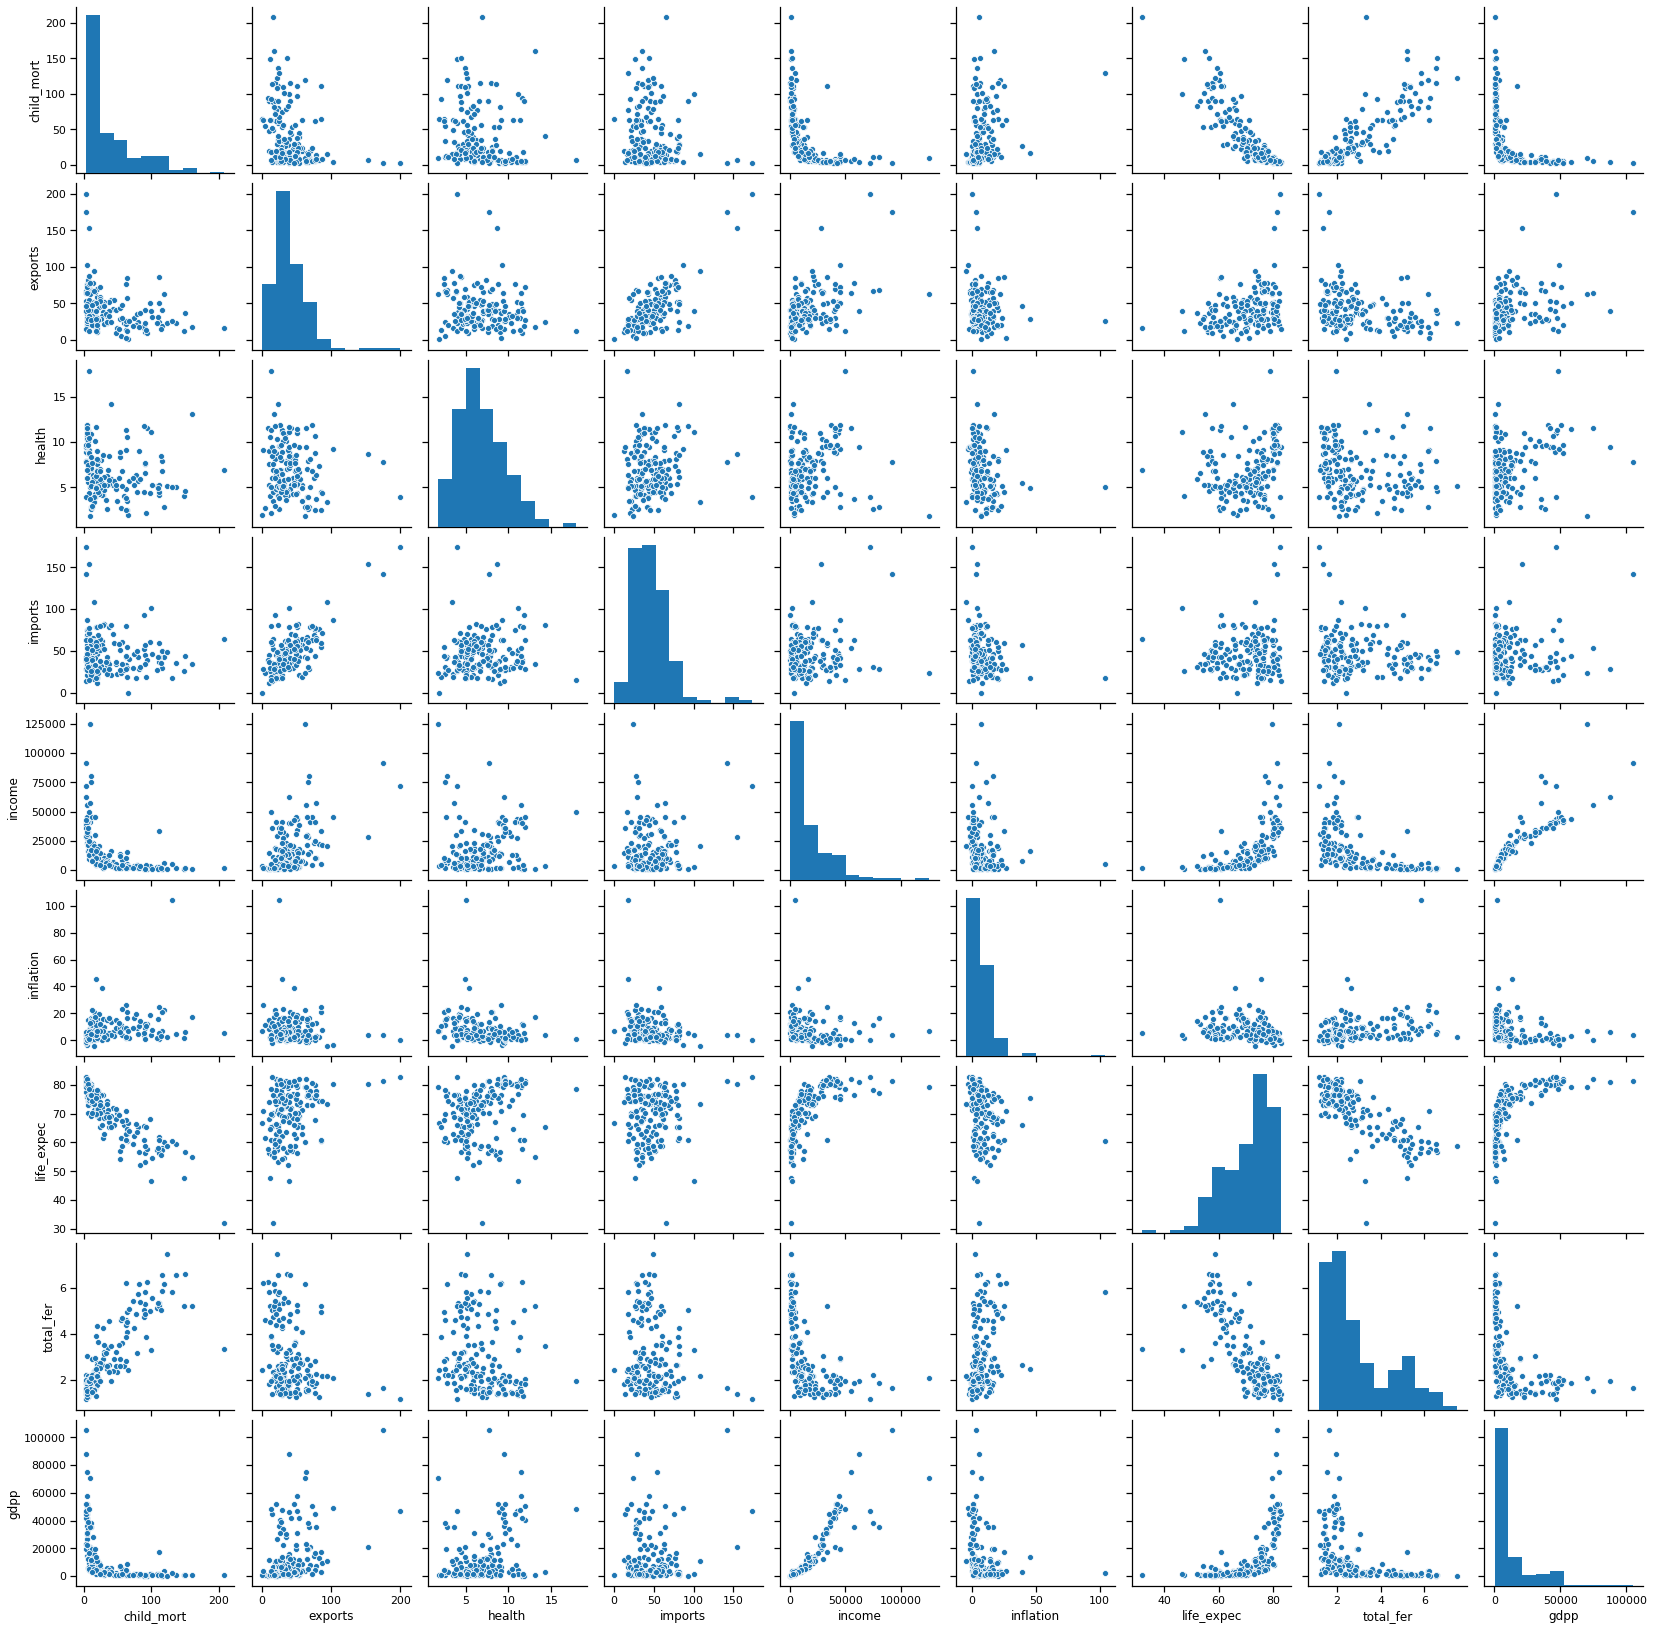

In [5]:
sns.set_context('notebook')
sns.pairplot(data)

In [6]:
data['inflation'] = data['inflation'] +5

In [7]:
log_f = FunctionTransformer(np.log)

estimators = [('log', log_f), ('StandardScaler', StandardScaler())]
pipe = Pipeline(estimators)

# Convert the original data
data_pipe = pd.DataFrame(pipe.fit_transform(data.drop(['country'], axis=1)), columns = data.columns.to_list()[1::])

In [8]:
data_pipe.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-1.515754e-16,2.634287e-16,4.364440e-16,7.977650e-18,5.757204e-16,-2.559496e-16,-1.723173e-15,-2.366703e-16,3.383853e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.809110e+00,-7.459472e+00,-2.939059e+00,-9.390595e+00,-2.206478e+00,-4.254414e+00,-5.628619e+00,-1.715309e+00,-2.044268e+00
25%,-8.115091e-01,-4.359711e-01,-5.721137e-01,-4.334014e-01,-8.138497e-01,-7.126295e-01,-4.951252e-01,-7.863465e-01,-8.738276e-01
50%,-7.589583e-02,6.693539e-02,2.061154e-02,9.333909e-02,7.421119e-02,-1.800257e-02,3.205559e-01,-1.716296e-01,-3.535021e-02
75%,9.345347e-01,5.667825e-01,7.497072e-01,5.393911e-01,7.501095e-01,6.659079e-01,6.774915e-01,8.218855e-01,7.020849e-01
max,1.979683e+00,2.339779e+00,2.484844e+00,2.126585e+00,2.138808e+00,3.846716e+00,1.221273e+00,2.194266e+00,2.047517e+00


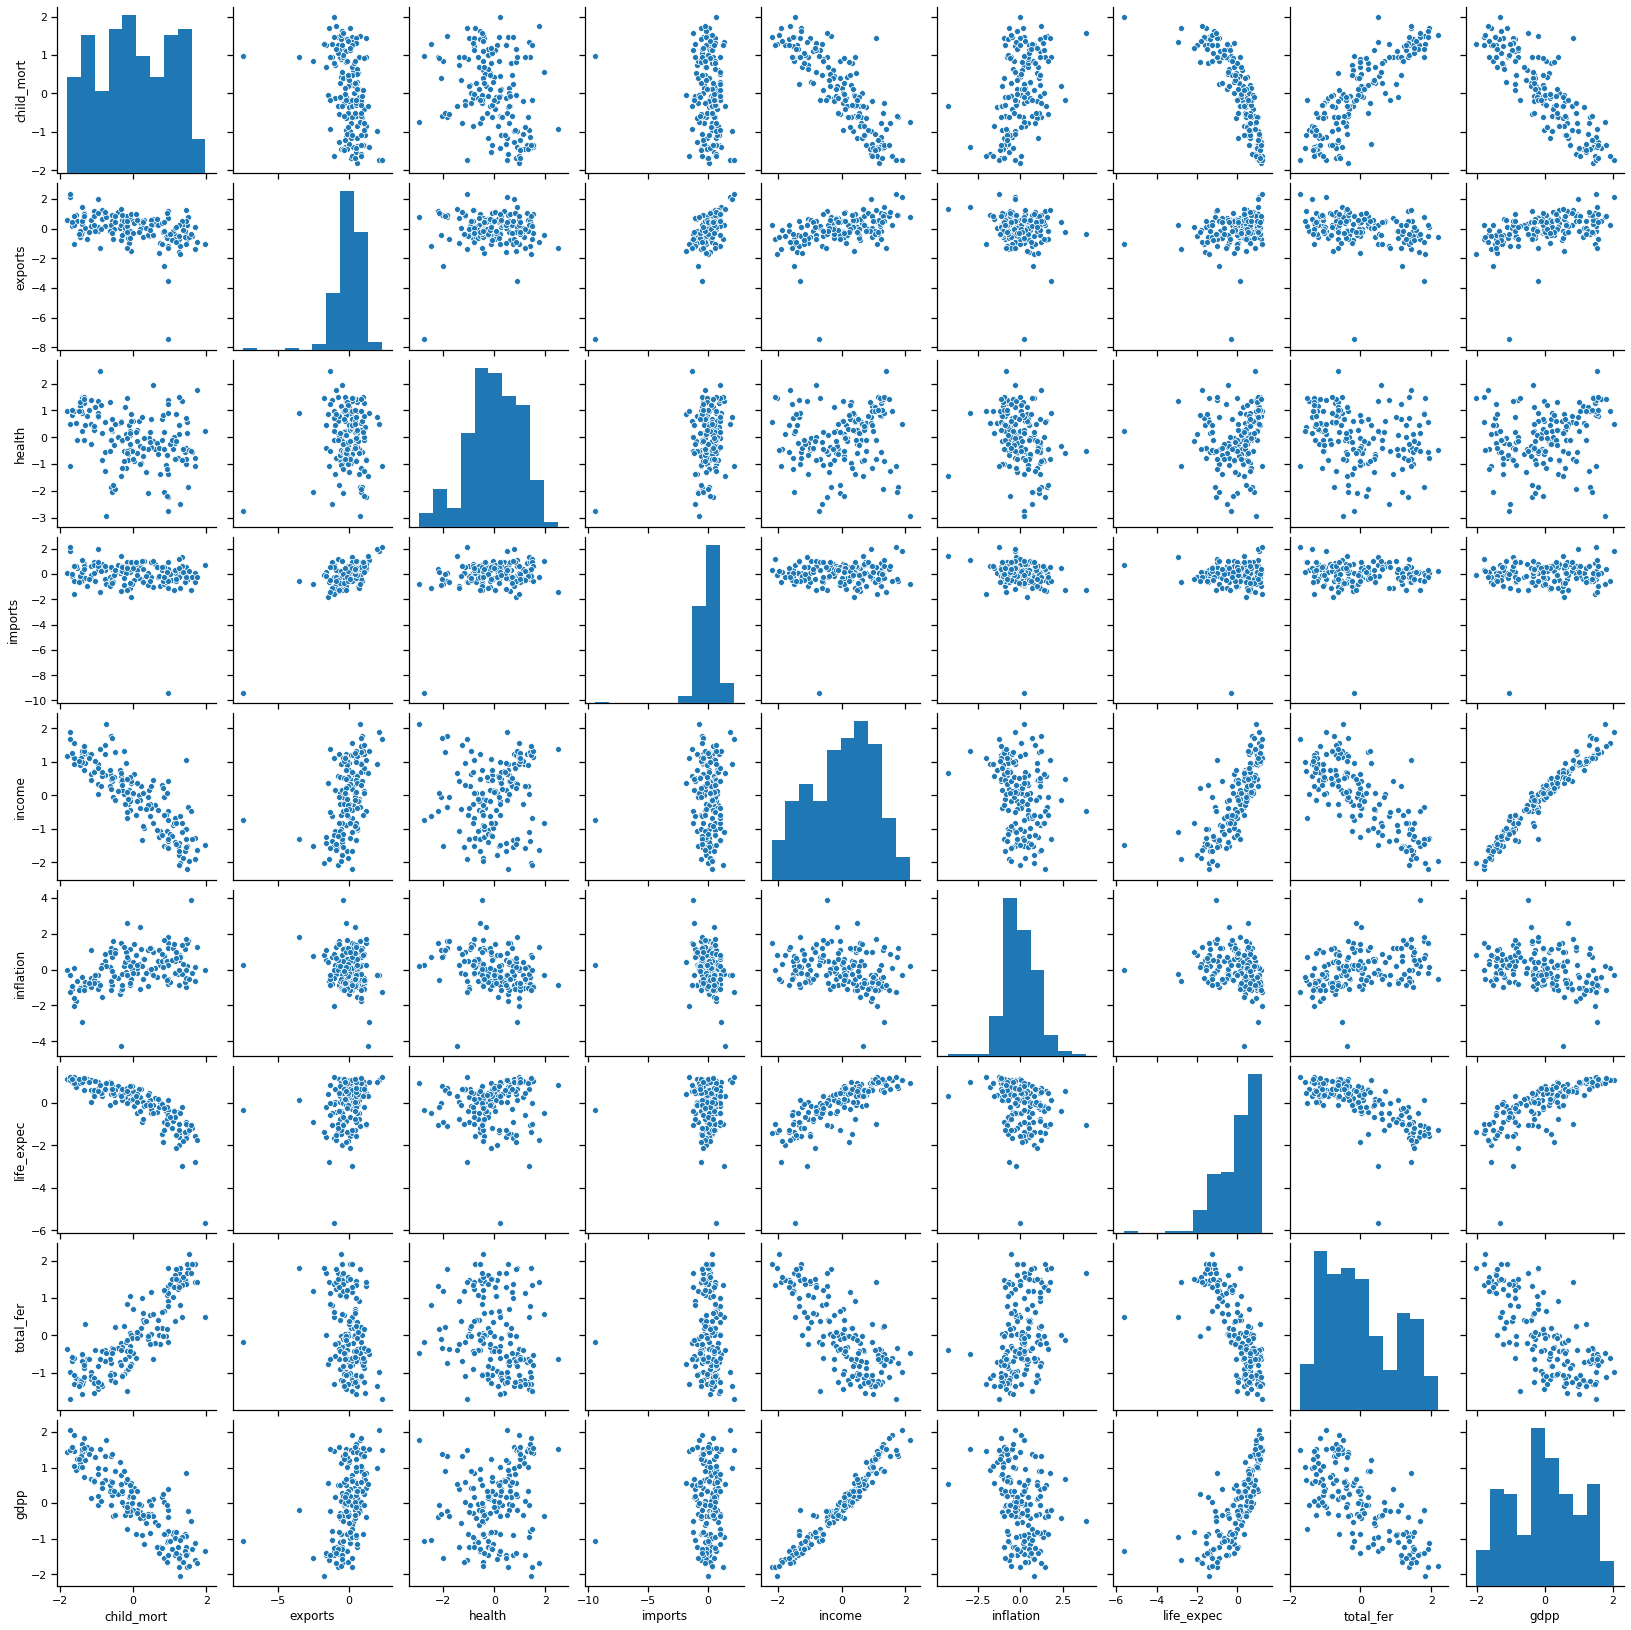

In [9]:
sns.pairplot(data_pipe)

In [10]:
# View the pairwise correlation plots of the new data
corr_mat = data_pipe.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,0.000000,-0.377294,-0.338038,-0.136337,-0.857793,0.450583,-0.841512,0.861246,-0.876190
exports,-0.377294,0.000000,0.021805,0.741665,0.466023,-0.163376,0.276546,-0.316234,0.430254
health,-0.338038,0.021805,0.000000,0.225896,0.112270,-0.319300,0.161241,-0.238296,0.234557
imports,-0.136337,0.741665,0.225896,0.000000,0.032598,-0.239644,0.008868,-0.079023,0.058695
income,-0.857793,0.466023,0.112270,0.032598,0.000000,-0.268789,0.769880,-0.769648,0.972035
inflation,0.450583,-0.163376,-0.319300,-0.239644,-0.268789,0.000000,-0.299045,0.395787,-0.344774
life_expec,-0.841512,0.276546,0.161241,0.008868,0.769880,-0.299045,0.000000,-0.729696,0.755764
total_fer,0.861246,-0.316234,-0.238296,-0.079023,-0.769648,0.395787,-0.729696,0.000000,-0.735839
gdpp,-0.876190,0.430254,0.234557,0.058695,0.972035,-0.344774,0.755764,-0.735839,0.000000


In [11]:
# Have a look at two categories with their respective most strongly correlated variable
corr_mat.abs().idxmax()

child_mort          gdpp
exports          imports
health        child_mort
imports          exports
income              gdpp
inflation     child_mort
life_expec    child_mort
total_fer     child_mort
gdpp              income
dtype: object

In [12]:
pca_list = list()
feature_weight_list = list()

for n in range(1, 9):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_pipe)
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    #print(n,np.abs(PCAmod.components_).sum(axis=0), PCAmod.explained_variance_ratio_.sum())
    pca_params = (abs_feature_values/abs_feature_values.sum()).tolist()
    pca_params.append(n)
    pca_params.append(PCAmod.explained_variance_ratio_.sum())
    pca_list.append(pca_params)
    
pca_params = pd.DataFrame(pca_list)


In [13]:
pca_params.drop([9], axis=1, inplace=True)


In [14]:
columns = data_pipe.columns.to_list()
columns.append('value')
k=0
for name in columns:
    if k>8:
        break
    
    pca_params.rename(columns={k: name}, inplace=True)
    k+=1

In [15]:
pca_params.rename(columns={10: 'variance'}, inplace=True)

In [16]:
k=0
for i in range(8,0,-1):
    dex=7-k
    pca_params.rename(index={dex: i}, inplace=True)
    k+=1
pca_params

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,variance
1,0.157842,0.085310,0.052698,0.037755,0.151074,0.080225,0.139330,0.143308,0.152458,0.530054
2,0.103794,0.156761,0.060882,0.167076,0.110701,0.075783,0.115510,0.102592,0.106901,0.709093
3,0.081672,0.164024,0.142408,0.122688,0.108880,0.124198,0.090682,0.076469,0.088978,0.838039
4,0.070022,0.136510,0.183373,0.103038,0.095213,0.187511,0.075269,0.066889,0.082174,0.911624
5,0.066379,0.118566,0.150832,0.101257,0.105991,0.160077,0.100141,0.091095,0.105663,0.949764
6,0.058139,0.105456,0.133106,0.092991,0.096407,0.145527,0.138654,0.133315,0.096405,0.978892
7,0.067199,0.128861,0.125207,0.113776,0.086608,0.129536,0.129899,0.120420,0.098493,0.991490
8,0.104332,0.124640,0.112567,0.111886,0.090301,0.115373,0.126182,0.119084,0.095635,0.998575


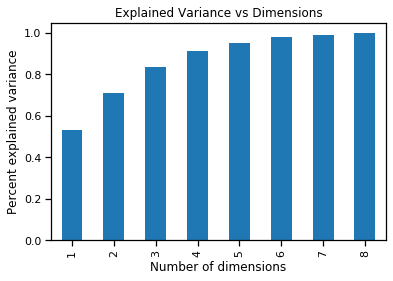

In [17]:
ax = pca_params['variance'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [18]:
pca_params.rename(index={1: 2}, inplace=True)

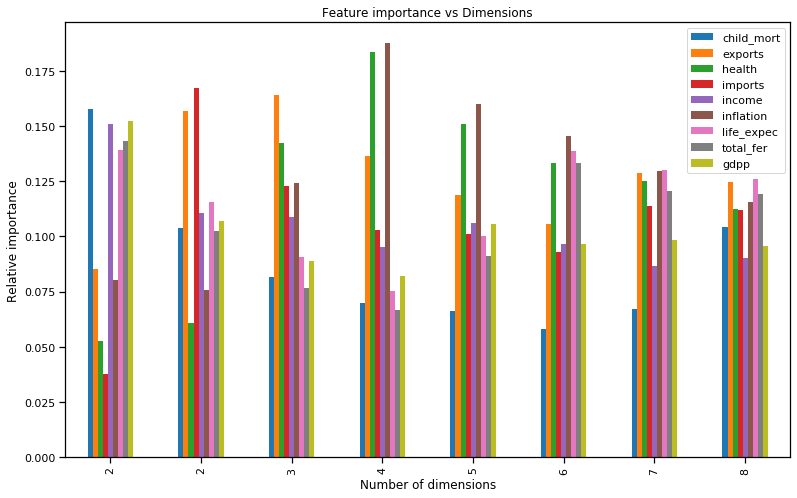

In [19]:
ax = pca_params[data_pipe.columns.to_list()].plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [20]:
# The number of dimensions can be shrunk to 5 with retaining ~95% explained variance
PCAmod = PCA(n_components=5)
data_pca = pd.DataFrame(PCAmod.fit_transform(data_pipe))

In [21]:
data_pca

,0,1,2,3,4
0,3.454795,-0.209938,-1.099316,-0.404099,0.138296
1,-0.724634,0.138861,-0.234399,0.096472,-0.875220
2,0.229376,0.628295,1.460002,-0.324374,-0.309764
3,2.461992,-0.592158,2.441331,-0.085737,0.939433
4,-1.540536,-0.351213,0.024479,0.535967,-0.025921
...,...,...,...,...,...
162,0.987625,-0.954257,-0.038403,0.724814,0.196901
163,0.010498,1.806334,1.814913,-1.723529,-0.094550
164,0.091231,-1.254281,0.480934,-0.679145,-1.301914
165,2.065601,0.139928,0.960479,-0.894617,-0.164733


## KMeans

In [22]:
# Since original data is not devided into any calsses, we will devide it with KMeans into 2 classes
kmeans = KMeans(n_clusters=2, max_iter=50, random_state=0)
kmeans.fit(data_pca)
data_kmeans_2 = data.copy()
data_kmeans_2['cluster_id'] = kmeans.labels_
data_kmeans_2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,14.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,9.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,21.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,27.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,6.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,25.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,12.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,6.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,5.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,18.800,69.1,1.92,5840,1


In [23]:
data_kmeans_2['cluster_id'].value_counts()

1    98
0    69
Name: cluster_id, dtype: int64

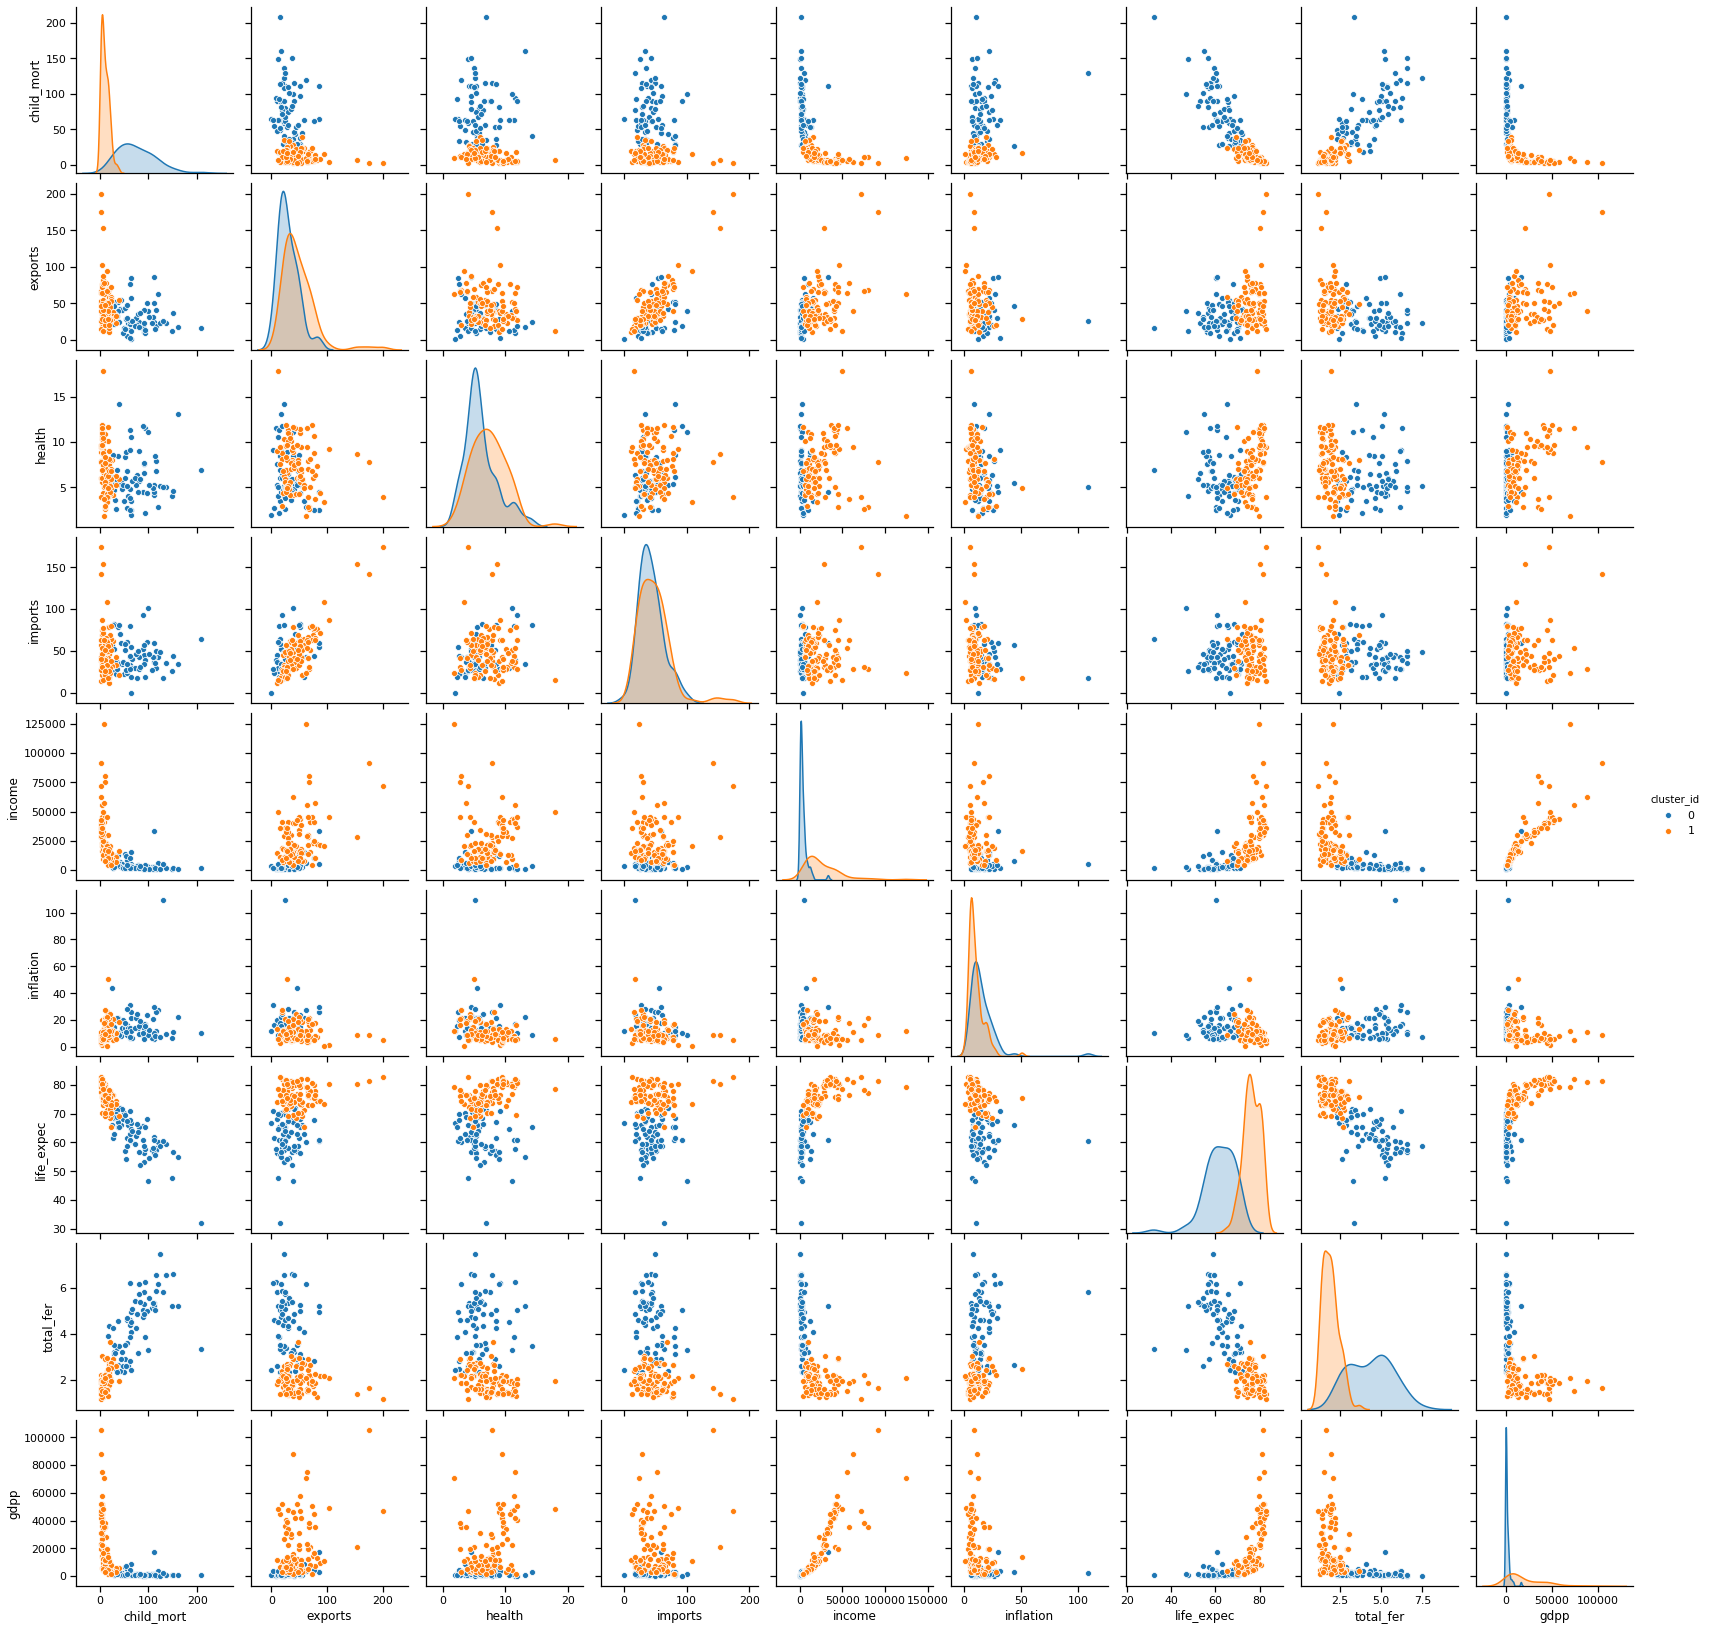

In [24]:
sns.set_context('notebook')
sns.pairplot(data_kmeans_2, hue='cluster_id')

In [25]:
pd.pivot_table(data_kmeans_2, index=['cluster_id'],
                    values=data_kmeans_2.columns.to_list()[:-1], aggfunc=np.median).sort_values(['life_expec'])

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,64.4,25.00,1170,5.300,42.70,2660,12.640,62.2,4.560
1,10.3,39.95,11950,7.065,45.75,19750,8.375,76.4,1.875


## Single Hidden Layer Neural Network

In [27]:
#del model_1

In [28]:
# On full data 
from sklearn.model_selection import train_test_split
y = data_kmeans_2['cluster_id']
X = data_pipe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# Define the Model 
# Input size is 9-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

# activation = 'sigmoid'
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (9,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(gradient_descent.SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
4/4 [==============================] - 14s 169ms/step - loss: 0.6843 - accuracy: 0.5948 - val_loss: 0.6490 - val_accuracy: 0.6429
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6862 - accuracy: 0.5750 - val_loss: 0.6482 - val_accuracy: 0.6429
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6873 - accuracy: 0.5760 - val_loss: 0.6474 - val_accuracy: 0.6429
Epoch 4/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5510 - val_loss: 0.6467 - val_accuracy: 0.6429
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5718 - val_loss: 0.6459 - val_accuracy: 0.6429
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6810 - accuracy: 0.5708 - val_loss: 0.6452 - val_accuracy: 0.6429
Epoch 7/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.5770 - val_loss: 0.6444 - val_accuracy: 0.6429
Epoch 8/300
4/4 [=====

4/4 [==============================] - 0s 8ms/step - loss: 0.6410 - accuracy: 0.6287 - val_loss: 0.6063 - val_accuracy: 0.6905
Epoch 60/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.6131 - val_loss: 0.6056 - val_accuracy: 0.6905
Epoch 61/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6464 - accuracy: 0.6184 - val_loss: 0.6049 - val_accuracy: 0.6905
Epoch 62/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6466 - val_loss: 0.6042 - val_accuracy: 0.6905
Epoch 63/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6276 - accuracy: 0.6602 - val_loss: 0.6035 - val_accuracy: 0.6905
Epoch 64/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6307 - accuracy: 0.6747 - val_loss: 0.6028 - val_accuracy: 0.7143
Epoch 65/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6340 - accuracy: 0.6300 - val_loss: 0.6021 - val_accuracy: 0.7143
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.5895 - accuracy: 0.7405 - val_loss: 0.5669 - val_accuracy: 0.8095
Epoch 118/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5997 - accuracy: 0.7415 - val_loss: 0.5663 - val_accuracy: 0.8095
Epoch 119/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5818 - accuracy: 0.7498 - val_loss: 0.5656 - val_accuracy: 0.8095
Epoch 120/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5905 - accuracy: 0.7352 - val_loss: 0.5650 - val_accuracy: 0.8095
Epoch 121/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.7582 - val_loss: 0.5643 - val_accuracy: 0.8095
Epoch 122/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5832 - accuracy: 0.7613 - val_loss: 0.5636 - val_accuracy: 0.8095
Epoch 123/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5850 - accuracy: 0.7416 - val_loss: 0.5630 - val_accuracy: 0.8095
Epoch 124/300
4/4 [========

Epoch 175/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5430 - accuracy: 0.8117 - val_loss: 0.5299 - val_accuracy: 0.8333
Epoch 176/300
4/4 [==============================] - 0s 8ms/step - loss: 0.5432 - accuracy: 0.8117 - val_loss: 0.5292 - val_accuracy: 0.8333
Epoch 177/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5355 - accuracy: 0.8336 - val_loss: 0.5286 - val_accuracy: 0.8333
Epoch 178/300
4/4 [==============================] - 0s 8ms/step - loss: 0.5637 - accuracy: 0.7503 - val_loss: 0.5280 - val_accuracy: 0.8333
Epoch 179/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5416 - accuracy: 0.8201 - val_loss: 0.5274 - val_accuracy: 0.8333
Epoch 180/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.7867 - val_loss: 0.5268 - val_accuracy: 0.8333
Epoch 181/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.8232 - val_loss: 0.5261 - val_accuracy: 0.8333
Epoch 182/300

4/4 [==============================] - 0s 7ms/step - loss: 0.5005 - accuracy: 0.8571 - val_loss: 0.4950 - val_accuracy: 0.8571
Epoch 234/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5084 - accuracy: 0.8644 - val_loss: 0.4945 - val_accuracy: 0.8571
Epoch 235/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5091 - accuracy: 0.8738 - val_loss: 0.4939 - val_accuracy: 0.8571
Epoch 236/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5067 - accuracy: 0.8457 - val_loss: 0.4933 - val_accuracy: 0.8571
Epoch 237/300
4/4 [==============================] - 0s 8ms/step - loss: 0.5023 - accuracy: 0.8645 - val_loss: 0.4927 - val_accuracy: 0.8571
Epoch 238/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5069 - accuracy: 0.8447 - val_loss: 0.4921 - val_accuracy: 0.8571
Epoch 239/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4935 - accuracy: 0.8905 - val_loss: 0.4916 - val_accuracy: 0.8571
Epoch 240/300
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.9084 - val_loss: 0.4626 - val_accuracy: 0.9524
Epoch 292/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4631 - accuracy: 0.8824 - val_loss: 0.4621 - val_accuracy: 0.9524
Epoch 293/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4591 - accuracy: 0.9011 - val_loss: 0.4615 - val_accuracy: 0.9524
Epoch 294/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4663 - accuracy: 0.9042 - val_loss: 0.4610 - val_accuracy: 0.9524
Epoch 295/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4543 - accuracy: 0.9094 - val_loss: 0.4605 - val_accuracy: 0.9524
Epoch 296/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4692 - accuracy: 0.8792 - val_loss: 0.4599 - val_accuracy: 0.9524
Epoch 297/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4490 - accuracy: 0.9303 - val_loss: 0.4594 - val_accuracy: 0.9524
Epoch 298/300
4/4 [========

In [32]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.952
roc-auc is 0.990


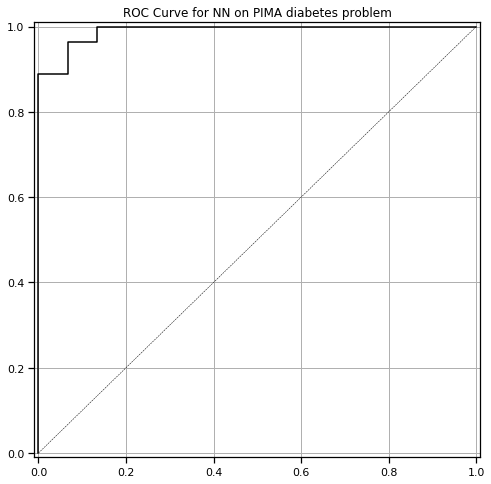

In [33]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

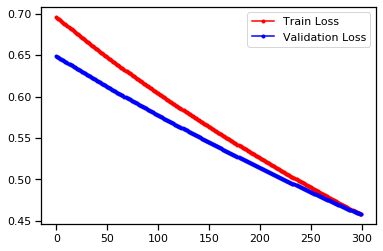

In [34]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [35]:
run_hist_1b = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.9040 - val_loss: 0.4573 - val_accuracy: 0.9524
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4565 - accuracy: 0.9040 - val_loss: 0.4568 - val_accuracy: 0.9524
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4558 - accuracy: 0.9040 - val_loss: 0.4562 - val_accuracy: 0.9524
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4552 - accuracy: 0.9040 - val_loss: 0.4557 - val_accuracy: 0.9524
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.9040 - val_loss: 0.4552 - val_accuracy: 0.9524
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 0.4539 - accuracy: 0.9120 - val_loss: 0.4546 - val_accuracy: 0.9524
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4532 - accuracy: 0.9120 - val_loss: 0.4541 - val_accuracy: 0.9524
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 8ms/step - loss: 0.4214 - accuracy: 0.9280 - val_loss: 0.4277 - val_accuracy: 0.9286
Epoch 60/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4209 - accuracy: 0.9280 - val_loss: 0.4273 - val_accuracy: 0.9286
Epoch 61/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4203 - accuracy: 0.9280 - val_loss: 0.4268 - val_accuracy: 0.9286
Epoch 62/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4197 - accuracy: 0.9280 - val_loss: 0.4263 - val_accuracy: 0.9286
Epoch 63/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4191 - accuracy: 0.9280 - val_loss: 0.4258 - val_accuracy: 0.9286
Epoch 64/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4186 - accuracy: 0.9360 - val_loss: 0.4253 - val_accuracy: 0.9524
Epoch 65/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4180 - accuracy: 0.9360 - val_loss: 0.4249 - val_accuracy: 0.9524
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.3889 - accuracy: 0.9520 - val_loss: 0.4008 - val_accuracy: 0.9524
Epoch 118/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3884 - accuracy: 0.9520 - val_loss: 0.4003 - val_accuracy: 0.9524
Epoch 119/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.9520 - val_loss: 0.3999 - val_accuracy: 0.9524
Epoch 120/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.9520 - val_loss: 0.3995 - val_accuracy: 0.9524
Epoch 121/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3868 - accuracy: 0.9520 - val_loss: 0.3990 - val_accuracy: 0.9524
Epoch 122/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3863 - accuracy: 0.9520 - val_loss: 0.3986 - val_accuracy: 0.9524
Epoch 123/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3858 - accuracy: 0.9520 - val_loss: 0.3981 - val_accuracy: 0.9524
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.3595 - accuracy: 0.9520 - val_loss: 0.3764 - val_accuracy: 0.9524
Epoch 176/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3591 - accuracy: 0.9520 - val_loss: 0.3760 - val_accuracy: 0.9524
Epoch 177/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3586 - accuracy: 0.9520 - val_loss: 0.3756 - val_accuracy: 0.9524
Epoch 178/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3581 - accuracy: 0.9520 - val_loss: 0.3752 - val_accuracy: 0.9524
Epoch 179/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3576 - accuracy: 0.9520 - val_loss: 0.3748 - val_accuracy: 0.9524
Epoch 180/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3572 - accuracy: 0.9520 - val_loss: 0.3744 - val_accuracy: 0.9524
Epoch 181/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3567 - accuracy: 0.9520 - val_loss: 0.3740 - val_accuracy: 0.9524
Epoch 182/300
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.3331 - accuracy: 0.9600 - val_loss: 0.3545 - val_accuracy: 0.9524
Epoch 234/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3327 - accuracy: 0.9600 - val_loss: 0.3541 - val_accuracy: 0.9524
Epoch 235/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3323 - accuracy: 0.9600 - val_loss: 0.3537 - val_accuracy: 0.9524
Epoch 236/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3319 - accuracy: 0.9600 - val_loss: 0.3534 - val_accuracy: 0.9524
Epoch 237/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3314 - accuracy: 0.9600 - val_loss: 0.3530 - val_accuracy: 0.9524
Epoch 238/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3310 - accuracy: 0.9600 - val_loss: 0.3527 - val_accuracy: 0.9524
Epoch 239/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3306 - accuracy: 0.9600 - val_loss: 0.3523 - val_accuracy: 0.9524
Epoch 240/300
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.3095 - accuracy: 0.9840 - val_loss: 0.3349 - val_accuracy: 0.9524
Epoch 292/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3091 - accuracy: 0.9840 - val_loss: 0.3345 - val_accuracy: 0.9524
Epoch 293/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3087 - accuracy: 0.9840 - val_loss: 0.3342 - val_accuracy: 0.9524
Epoch 294/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.9840 - val_loss: 0.3339 - val_accuracy: 0.9524
Epoch 295/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3080 - accuracy: 0.9840 - val_loss: 0.3336 - val_accuracy: 0.9524
Epoch 296/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3076 - accuracy: 0.9840 - val_loss: 0.3333 - val_accuracy: 0.9524
Epoch 297/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.9840 - val_loss: 0.3329 - val_accuracy: 0.9524
Epoch 298/300
4/4 [========

In [36]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.952
roc-auc is 0.995


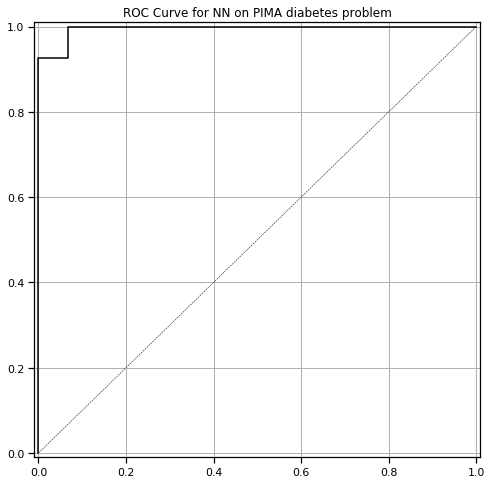

In [37]:
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

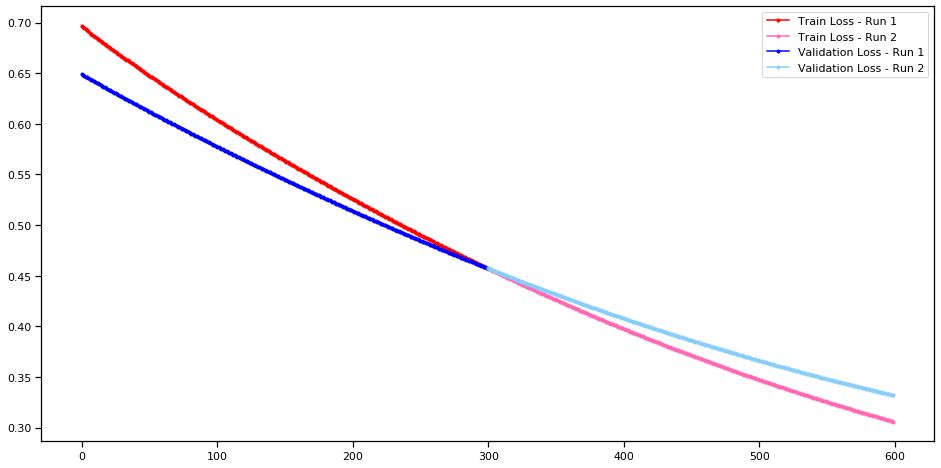

In [38]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

In [41]:
del model_1


In [42]:
# activation = 'relu'
model_2 = Sequential()
model_2.add(Dense(12,input_shape = (9,),activation = 'relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [43]:
model_2.compile(gradient_descent.SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 74ms/step - loss: 0.9451 - accuracy: 0.2683 - val_loss: 0.9941 - val_accuracy: 0.2381
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9299 - accuracy: 0.2880 - val_loss: 0.9790 - val_accuracy: 0.2381
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9219 - accuracy: 0.3308 - val_loss: 0.9645 - val_accuracy: 0.2381
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9320 - accuracy: 0.2558 - val_loss: 0.9504 - val_accuracy: 0.2381
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8783 - accuracy: 0.2651 - val_loss: 0.9366 - val_accuracy: 0.2381
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8530 - accuracy: 0.3339 - val_loss: 0.9232 - val_accuracy: 0.2381
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8290 - accuracy: 0.3362 - val_loss: 0.9102 - val_accuracy: 0.2381
Epoch 8/50
4/4 [=================

In [44]:
y_pred_class_nn_2 = model_2.predict_classes(X_test)
y_pred_prob_nn_2 = model_2.predict(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

accuracy is 0.714
roc-auc is 0.812


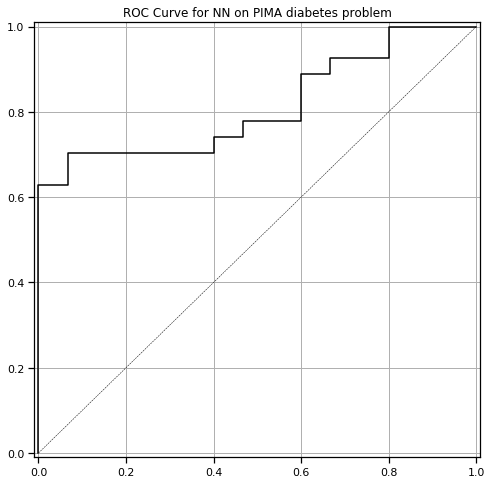

In [45]:
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

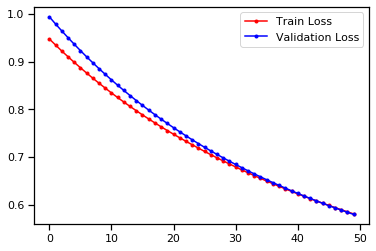

In [46]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [47]:
del model_2

In [48]:
# activation = 'softmax'
model_3 = Sequential()
model_3.add(Dense(12,input_shape = (9,),activation = 'softmax'))
model_3.add(Dense(1,activation='sigmoid'))

In [49]:
model_3.compile(gradient_descent.SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 69ms/step - loss: 0.6990 - accuracy: 0.4745 - val_loss: 0.7054 - val_accuracy: 0.3571
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6921 - accuracy: 0.5100 - val_loss: 0.7049 - val_accuracy: 0.3571
Epoch 3/400
4/4 [==============================] - 0s 9ms/step - loss: 0.6967 - accuracy: 0.4965 - val_loss: 0.7044 - val_accuracy: 0.3810
Epoch 4/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6963 - accuracy: 0.4777 - val_loss: 0.7039 - val_accuracy: 0.3810
Epoch 5/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5058 - val_loss: 0.7034 - val_accuracy: 0.3810
Epoch 6/400
4/4 [==============================] - 0s 9ms/step - loss: 0.6949 - accuracy: 0.5049 - val_loss: 0.7029 - val_accuracy: 0.3810
Epoch 7/400
4/4 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.4560 - val_loss: 0.7024 - val_accuracy: 0.4048
Epoch 8/400
4/4 [=========

4/4 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.5963 - val_loss: 0.6791 - val_accuracy: 0.5952
Epoch 60/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.6567 - val_loss: 0.6787 - val_accuracy: 0.5952
Epoch 61/400
4/4 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5869 - val_loss: 0.6783 - val_accuracy: 0.5952
Epoch 62/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6709 - accuracy: 0.6078 - val_loss: 0.6779 - val_accuracy: 0.5952
Epoch 63/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6703 - accuracy: 0.6140 - val_loss: 0.6774 - val_accuracy: 0.5952
Epoch 64/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.5994 - val_loss: 0.6770 - val_accuracy: 0.5952
Epoch 65/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6653 - accuracy: 0.6265 - val_loss: 0.6766 - val_accuracy: 0.5952
Epoch 66/400
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.6553 - accuracy: 0.7066 - val_loss: 0.6571 - val_accuracy: 0.6667
Epoch 118/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6495 - accuracy: 0.7483 - val_loss: 0.6567 - val_accuracy: 0.6667
Epoch 119/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6546 - accuracy: 0.7119 - val_loss: 0.6564 - val_accuracy: 0.6667
Epoch 120/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6465 - accuracy: 0.7452 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 121/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.6974 - val_loss: 0.6557 - val_accuracy: 0.6667
Epoch 122/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6567 - accuracy: 0.6672 - val_loss: 0.6553 - val_accuracy: 0.6667
Epoch 123/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6423 - accuracy: 0.7797 - val_loss: 0.6550 - val_accuracy: 0.6667
Epoch 124/400
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.6395 - accuracy: 0.7958 - val_loss: 0.6381 - val_accuracy: 0.7619
Epoch 176/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6376 - accuracy: 0.8323 - val_loss: 0.6378 - val_accuracy: 0.7619
Epoch 177/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6434 - accuracy: 0.7698 - val_loss: 0.6375 - val_accuracy: 0.7619
Epoch 178/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6334 - accuracy: 0.8116 - val_loss: 0.6372 - val_accuracy: 0.7619
Epoch 179/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6378 - accuracy: 0.7772 - val_loss: 0.6369 - val_accuracy: 0.7619
Epoch 180/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6385 - accuracy: 0.7928 - val_loss: 0.6366 - val_accuracy: 0.7857
Epoch 181/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6337 - accuracy: 0.8169 - val_loss: 0.6363 - val_accuracy: 0.7857
Epoch 182/400
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.6180 - accuracy: 0.8844 - val_loss: 0.6215 - val_accuracy: 0.8095
Epoch 234/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6256 - accuracy: 0.8917 - val_loss: 0.6212 - val_accuracy: 0.8333
Epoch 235/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6261 - accuracy: 0.8990 - val_loss: 0.6210 - val_accuracy: 0.8333
Epoch 236/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6277 - accuracy: 0.8397 - val_loss: 0.6207 - val_accuracy: 0.8333
Epoch 237/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6195 - accuracy: 0.9094 - val_loss: 0.6204 - val_accuracy: 0.8333
Epoch 238/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6218 - accuracy: 0.9292 - val_loss: 0.6202 - val_accuracy: 0.8333
Epoch 239/400
4/4 [==============================] - 0s 8ms/step - loss: 0.6180 - accuracy: 0.9136 - val_loss: 0.6199 - val_accuracy: 0.8333
Epoch 240/400
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.6124 - accuracy: 0.9140 - val_loss: 0.6066 - val_accuracy: 0.9048
Epoch 292/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6117 - accuracy: 0.9431 - val_loss: 0.6064 - val_accuracy: 0.9048
Epoch 293/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.9140 - val_loss: 0.6061 - val_accuracy: 0.9048
Epoch 294/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6091 - accuracy: 0.9411 - val_loss: 0.6059 - val_accuracy: 0.9048
Epoch 295/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6134 - accuracy: 0.9484 - val_loss: 0.6056 - val_accuracy: 0.8810
Epoch 296/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6096 - accuracy: 0.9244 - val_loss: 0.6054 - val_accuracy: 0.8810
Epoch 297/400
4/4 [==============================] - 0s 7ms/step - loss: 0.6072 - accuracy: 0.9515 - val_loss: 0.6051 - val_accuracy: 0.8810
Epoch 298/400
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.5974 - accuracy: 0.9222 - val_loss: 0.5930 - val_accuracy: 0.9286
Epoch 350/400
4/4 [==============================] - 0s 8ms/step - loss: 0.5980 - accuracy: 0.9222 - val_loss: 0.5928 - val_accuracy: 0.9286
Epoch 351/400
4/4 [==============================] - 0s 7ms/step - loss: 0.5946 - accuracy: 0.9315 - val_loss: 0.5925 - val_accuracy: 0.9286
Epoch 352/400
4/4 [==============================] - 0s 7ms/step - loss: 0.5976 - accuracy: 0.9117 - val_loss: 0.5923 - val_accuracy: 0.9286
Epoch 353/400
4/4 [==============================] - 0s 9ms/step - loss: 0.5927 - accuracy: 0.9221 - val_loss: 0.5921 - val_accuracy: 0.9286
Epoch 354/400
4/4 [==============================] - 0s 12ms/step - loss: 0.5974 - accuracy: 0.9002 - val_loss: 0.5919 - val_accuracy: 0.9286
Epoch 355/400
4/4 [==============================] - 0s 10ms/step - loss: 0.6019 - accuracy: 0.9106 - val_loss: 0.5916 - val_accuracy: 0.9048
Epoch 356/400
4/4 [======

In [50]:
y_pred_class_nn_3 = model_3.predict_classes(X_test)
y_pred_prob_nn_3 = model_3.predict(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

accuracy is 0.881
roc-auc is 0.990


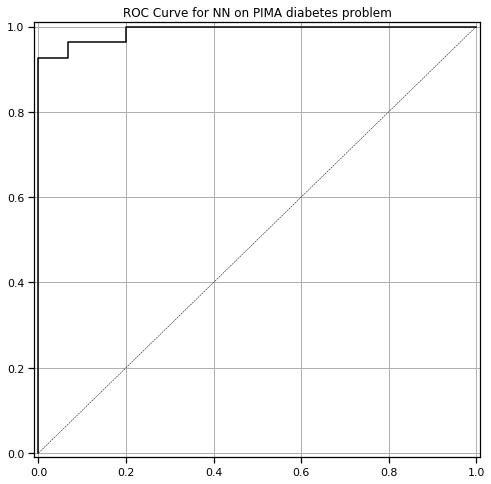

In [51]:
plot_roc(y_test, y_pred_prob_nn_3, 'NN')

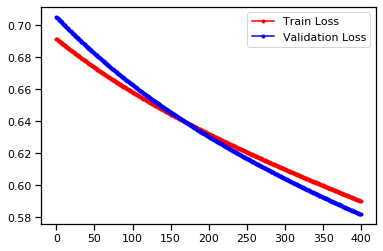

In [52]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [53]:
model_3.compile(gradient_descent.SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3b = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800)

Epoch 1/800
4/4 [==============================] - 1s 85ms/step - loss: 0.5959 - accuracy: 0.8709 - val_loss: 0.5817 - val_accuracy: 0.8810
Epoch 2/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.8865 - val_loss: 0.5814 - val_accuracy: 0.8810
Epoch 3/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5874 - accuracy: 0.8928 - val_loss: 0.5812 - val_accuracy: 0.8810
Epoch 4/800
4/4 [==============================] - 0s 11ms/step - loss: 0.6031 - accuracy: 0.8605 - val_loss: 0.5810 - val_accuracy: 0.8810
Epoch 5/800
4/4 [==============================] - 0s 12ms/step - loss: 0.5888 - accuracy: 0.8844 - val_loss: 0.5808 - val_accuracy: 0.8810
Epoch 6/800
4/4 [==============================] - 0s 10ms/step - loss: 0.5826 - accuracy: 0.8938 - val_loss: 0.5806 - val_accuracy: 0.8810
Epoch 7/800
4/4 [==============================] - 0s 9ms/step - loss: 0.5858 - accuracy: 0.8938 - val_loss: 0.5804 - val_accuracy: 0.8810
Epoch 8/800
4/4 [======

4/4 [==============================] - 0s 8ms/step - loss: 0.5849 - accuracy: 0.8887 - val_loss: 0.5698 - val_accuracy: 0.8810
Epoch 60/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5741 - accuracy: 0.8981 - val_loss: 0.5696 - val_accuracy: 0.8810
Epoch 61/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5795 - accuracy: 0.9106 - val_loss: 0.5694 - val_accuracy: 0.8810
Epoch 62/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.9022 - val_loss: 0.5692 - val_accuracy: 0.8810
Epoch 63/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5826 - accuracy: 0.9001 - val_loss: 0.5690 - val_accuracy: 0.8810
Epoch 64/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5748 - accuracy: 0.9012 - val_loss: 0.5688 - val_accuracy: 0.8810
Epoch 65/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5746 - accuracy: 0.8887 - val_loss: 0.5686 - val_accuracy: 0.8810
Epoch 66/800
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.5611 - accuracy: 0.8908 - val_loss: 0.5585 - val_accuracy: 0.8810
Epoch 118/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5720 - accuracy: 0.8866 - val_loss: 0.5583 - val_accuracy: 0.8810
Epoch 119/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5696 - accuracy: 0.9001 - val_loss: 0.5581 - val_accuracy: 0.8810
Epoch 120/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5725 - accuracy: 0.9033 - val_loss: 0.5580 - val_accuracy: 0.8810
Epoch 121/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5707 - accuracy: 0.9053 - val_loss: 0.5578 - val_accuracy: 0.8810
Epoch 122/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5725 - accuracy: 0.9168 - val_loss: 0.5576 - val_accuracy: 0.8810
Epoch 123/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5768 - accuracy: 0.8793 - val_loss: 0.5574 - val_accuracy: 0.8810
Epoch 124/800
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.5532 - accuracy: 0.9170 - val_loss: 0.5478 - val_accuracy: 0.8810
Epoch 176/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5534 - accuracy: 0.9232 - val_loss: 0.5476 - val_accuracy: 0.8810
Epoch 177/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5576 - accuracy: 0.9295 - val_loss: 0.5474 - val_accuracy: 0.8810
Epoch 178/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5557 - accuracy: 0.9170 - val_loss: 0.5472 - val_accuracy: 0.8810
Epoch 179/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5595 - accuracy: 0.9118 - val_loss: 0.5470 - val_accuracy: 0.8810
Epoch 180/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5625 - accuracy: 0.9065 - val_loss: 0.5469 - val_accuracy: 0.8810
Epoch 181/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5576 - accuracy: 0.9118 - val_loss: 0.5467 - val_accuracy: 0.8810
Epoch 182/800
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.5398 - accuracy: 0.9107 - val_loss: 0.5374 - val_accuracy: 0.8810
Epoch 234/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5569 - accuracy: 0.8951 - val_loss: 0.5373 - val_accuracy: 0.8810
Epoch 235/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.9222 - val_loss: 0.5371 - val_accuracy: 0.8810
Epoch 236/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5404 - accuracy: 0.9461 - val_loss: 0.5369 - val_accuracy: 0.8810
Epoch 237/800
4/4 [==============================] - 0s 6ms/step - loss: 0.5432 - accuracy: 0.9243 - val_loss: 0.5367 - val_accuracy: 0.8810
Epoch 238/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5415 - accuracy: 0.9263 - val_loss: 0.5366 - val_accuracy: 0.8810
Epoch 239/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5430 - accuracy: 0.9212 - val_loss: 0.5364 - val_accuracy: 0.8810
Epoch 240/800
4/4 [========

4/4 [==============================] - 0s 9ms/step - loss: 0.5318 - accuracy: 0.9484 - val_loss: 0.5274 - val_accuracy: 0.9286
Epoch 292/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5408 - accuracy: 0.9536 - val_loss: 0.5273 - val_accuracy: 0.9286
Epoch 293/800
4/4 [==============================] - 0s 9ms/step - loss: 0.5301 - accuracy: 0.9380 - val_loss: 0.5271 - val_accuracy: 0.9286
Epoch 294/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.9547 - val_loss: 0.5269 - val_accuracy: 0.9286
Epoch 295/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5345 - accuracy: 0.9526 - val_loss: 0.5268 - val_accuracy: 0.9524
Epoch 296/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5284 - accuracy: 0.9286 - val_loss: 0.5266 - val_accuracy: 0.9524
Epoch 297/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5355 - accuracy: 0.9526 - val_loss: 0.5264 - val_accuracy: 0.9524
Epoch 298/800
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.5262 - accuracy: 0.9558 - val_loss: 0.5177 - val_accuracy: 0.9762
Epoch 350/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5283 - accuracy: 0.9579 - val_loss: 0.5175 - val_accuracy: 0.9762
Epoch 351/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5111 - accuracy: 0.9371 - val_loss: 0.5174 - val_accuracy: 0.9762
Epoch 352/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.9485 - val_loss: 0.5172 - val_accuracy: 0.9762
Epoch 353/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5372 - accuracy: 0.9475 - val_loss: 0.5171 - val_accuracy: 0.9762
Epoch 354/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5243 - accuracy: 0.9516 - val_loss: 0.5169 - val_accuracy: 0.9762
Epoch 355/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5203 - accuracy: 0.9454 - val_loss: 0.5167 - val_accuracy: 0.9762
Epoch 356/800
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.5222 - accuracy: 0.9748 - val_loss: 0.5082 - val_accuracy: 0.9762
Epoch 408/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5217 - accuracy: 0.9737 - val_loss: 0.5081 - val_accuracy: 0.9762
Epoch 409/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5223 - accuracy: 0.9789 - val_loss: 0.5079 - val_accuracy: 0.9762
Epoch 410/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5015 - accuracy: 0.9852 - val_loss: 0.5077 - val_accuracy: 0.9762
Epoch 411/800
4/4 [==============================] - 0s 8ms/step - loss: 0.5233 - accuracy: 0.9737 - val_loss: 0.5076 - val_accuracy: 0.9762
Epoch 412/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.9769 - val_loss: 0.5074 - val_accuracy: 0.9762
Epoch 413/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5157 - accuracy: 0.9769 - val_loss: 0.5072 - val_accuracy: 0.9762
Epoch 414/800
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.4998 - accuracy: 0.9916 - val_loss: 0.4989 - val_accuracy: 0.9762
Epoch 466/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5031 - accuracy: 0.9916 - val_loss: 0.4987 - val_accuracy: 0.9762
Epoch 467/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4995 - accuracy: 0.9853 - val_loss: 0.4986 - val_accuracy: 0.9762
Epoch 468/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5053 - accuracy: 0.9947 - val_loss: 0.4984 - val_accuracy: 0.9762
Epoch 469/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.9853 - val_loss: 0.4982 - val_accuracy: 0.9762
Epoch 470/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5145 - accuracy: 0.9916 - val_loss: 0.4981 - val_accuracy: 0.9762
Epoch 471/800
4/4 [==============================] - 0s 7ms/step - loss: 0.5080 - accuracy: 0.9916 - val_loss: 0.4979 - val_accuracy: 0.9762
Epoch 472/800
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.4916 - accuracy: 0.9947 - val_loss: 0.4897 - val_accuracy: 0.9762
Epoch 524/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.9853 - val_loss: 0.4895 - val_accuracy: 0.9762
Epoch 525/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4996 - accuracy: 0.9853 - val_loss: 0.4894 - val_accuracy: 0.9762
Epoch 526/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.9853 - val_loss: 0.4892 - val_accuracy: 0.9762
Epoch 527/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4901 - accuracy: 0.9968 - val_loss: 0.4891 - val_accuracy: 0.9762
Epoch 528/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4828 - accuracy: 0.9916 - val_loss: 0.4889 - val_accuracy: 0.9762
Epoch 529/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4873 - accuracy: 0.9853 - val_loss: 0.4887 - val_accuracy: 0.9762
Epoch 530/800
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.4878 - accuracy: 0.9853 - val_loss: 0.4806 - val_accuracy: 0.9524
Epoch 582/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4750 - accuracy: 0.9853 - val_loss: 0.4805 - val_accuracy: 0.9524
Epoch 583/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4844 - accuracy: 0.9916 - val_loss: 0.4803 - val_accuracy: 0.9524
Epoch 584/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4805 - accuracy: 0.9947 - val_loss: 0.4801 - val_accuracy: 0.9524
Epoch 585/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4645 - accuracy: 0.9968 - val_loss: 0.4800 - val_accuracy: 0.9524
Epoch 586/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4830 - accuracy: 0.9853 - val_loss: 0.4798 - val_accuracy: 0.9524
Epoch 587/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4788 - accuracy: 0.9853 - val_loss: 0.4797 - val_accuracy: 0.9524
Epoch 588/800
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.4676 - accuracy: 0.9916 - val_loss: 0.4716 - val_accuracy: 0.9762
Epoch 640/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4774 - accuracy: 0.9947 - val_loss: 0.4715 - val_accuracy: 0.9762
Epoch 641/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.9916 - val_loss: 0.4713 - val_accuracy: 0.9762
Epoch 642/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4693 - accuracy: 0.9947 - val_loss: 0.4711 - val_accuracy: 0.9762
Epoch 643/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4689 - accuracy: 0.9968 - val_loss: 0.4710 - val_accuracy: 0.9762
Epoch 644/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4725 - accuracy: 0.9916 - val_loss: 0.4708 - val_accuracy: 0.9762
Epoch 645/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4673 - accuracy: 0.9916 - val_loss: 0.4707 - val_accuracy: 0.9762
Epoch 646/800
4/4 [========

4/4 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.9853 - val_loss: 0.4627 - val_accuracy: 0.9762
Epoch 698/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4670 - accuracy: 0.9916 - val_loss: 0.4625 - val_accuracy: 0.9762
Epoch 699/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.9853 - val_loss: 0.4624 - val_accuracy: 0.9762
Epoch 700/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.9947 - val_loss: 0.4622 - val_accuracy: 0.9762
Epoch 701/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4463 - accuracy: 0.9968 - val_loss: 0.4621 - val_accuracy: 0.9762
Epoch 702/800
4/4 [==============================] - 0s 8ms/step - loss: 0.4599 - accuracy: 0.9916 - val_loss: 0.4619 - val_accuracy: 0.9762
Epoch 703/800
4/4 [==============================] - 0s 7ms/step - loss: 0.4552 - accuracy: 0.9821 - val_loss: 0.4617 - val_accuracy: 0.9762
Epoch 704/800
4/4 [========

4/4 [==============================] - 0s 11ms/step - loss: 0.4627 - accuracy: 0.9884 - val_loss: 0.4538 - val_accuracy: 0.9762
Epoch 756/800
4/4 [==============================] - 0s 10ms/step - loss: 0.4481 - accuracy: 0.9832 - val_loss: 0.4536 - val_accuracy: 0.9762
Epoch 757/800
4/4 [==============================] - 0s 12ms/step - loss: 0.4602 - accuracy: 0.9863 - val_loss: 0.4535 - val_accuracy: 0.9762
Epoch 758/800
4/4 [==============================] - 0s 12ms/step - loss: 0.4482 - accuracy: 0.9707 - val_loss: 0.4533 - val_accuracy: 0.9762
Epoch 759/800
4/4 [==============================] - 0s 11ms/step - loss: 0.4470 - accuracy: 0.9832 - val_loss: 0.4532 - val_accuracy: 0.9762
Epoch 760/800
4/4 [==============================] - 0s 10ms/step - loss: 0.4545 - accuracy: 0.9707 - val_loss: 0.4530 - val_accuracy: 0.9762
Epoch 761/800
4/4 [==============================] - 0s 10ms/step - loss: 0.4488 - accuracy: 0.9863 - val_loss: 0.4529 - val_accuracy: 0.9762
Epoch 762/800
4/4 [=

In [54]:
y_pred_class_nn_3 = model_3.predict_classes(X_test)
y_pred_prob_nn_3 = model_3.predict(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

accuracy is 0.976
roc-auc is 0.998


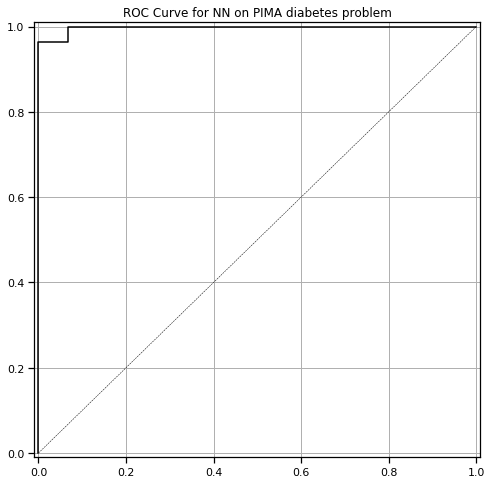

In [55]:
plot_roc(y_test, y_pred_prob_nn_3, 'NN')

In [56]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

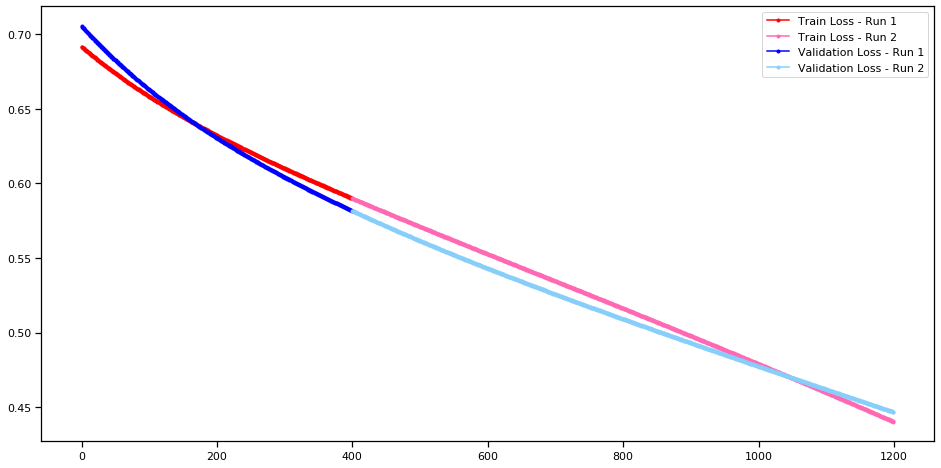

In [57]:
n = len(run_hist_3.history["loss"])
m = len(run_hist_3b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_3.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_3b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_3b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

In [58]:
del model_3

## Conclusions
All three models of single hidden layer neural networks with different activation functions eventually show excellent results in terms of accuracy. The initial dataset is very small, which is why the time of the process was very short in every model. The fact that such a simple neural network can predict the same clusters, as they were assigned by KMeans, confirms the applicability of KMeans clustering for the initial dataset. It would be interesting to learn which countries will actually get financial help and use this data for learning neural network.